# Manipulation de données avec Pandas

In [2]:
import numpy as np
import pandas as pd
import random as rd

## Les objets Pandas

### Series

Créer une \texttt{Series} constituée de 4 éléments compris entre 0.25 et 1 compris, linéairement séparés. Vérifier ses attributs.

In [3]:
# Création d'un tableau de données
values = np.linspace(0.25, 1, 4)

# Les valeurs de la Series
s = pd.Series(values)
print("Series :\n", s)

# Les indices
print("\nAttributs :")
print("Valeurs :", s.values)
print("Index :", s.index)
print("Taille :", s.size)
print("Dimension :", s.ndim)
print("Type des éléments :", s.dtype)
print("Première valeur :", s.iloc[0])
print("Dernière valeur :", s.iloc[-1])

Series :
 0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Attributs :
Valeurs : [0.25 0.5  0.75 1.  ]
Index : RangeIndex(start=0, stop=4, step=1)
Taille : 4
Dimension : 1
Type des éléments : float64
Première valeur : 0.25
Dernière valeur : 1.0


Sélectionner le deuxième élément des données précédemment créées. Du deuxième à l'avant-dernier.

In [4]:
# Sélection du deuxième élément 
print("Deuxième élément :", s.iloc[1])

# Sélection du deuxième au troisième
print("Du deuxième à l'avant-dernier :\n", s.iloc[1:-1])

Deuxième élément : 0.5
Du deuxième à l'avant-dernier :
 1    0.50
2    0.75
dtype: float64


Créer une *Series* reprenant les mêmes données que précédemment mais avec des indices explicitement définis (string). Sélectionner le deuxième élément. 

In [5]:
# Création des données
values = np.linspace(0.25, 1, 4)

# Création de la Series avec des indices string
s = pd.Series(values, index=["a", "b", "c", "d"])
print("Series :\n", s)

# Sélection du deuxième élément (index 'b')
print("\nDeuxième élément (par label) :", s["b"])

# Ou bien par position (toujours le 2ème) avec iloc
print("Deuxième élément (par position) :", s.iloc[1])

Series :
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Deuxième élément (par label) : 0.5
Deuxième élément (par position) : 0.5


Créer une série à partir d'un dictionnaire. Ce dictionnaire reprendra les populations de 5 États étatsuniens : 38 332 521 pour la Californie, 26 448 193 pour le Texas, 19 651 127 pour New-York, 19 552 860 pour la Floride et 12 882 135 pour l'Illinois. Afficher la population californienne. La population californienne, du Texas et de New-York.

In [6]:
# Création du dictionnaire
pop_dict = {
    "Californie": 38332521,
    "Texas": 26448193,
    "New-York": 19651127,
    "Floride": 19552860,
    "Illinois": 12882135
}

# Création de la series
pop = pd.Series(pop_dict)
print("Series des populations :\n", pop)

# La popultion californienne
print("\nPopulation de la Californie :", pop["Californie"])

# La population des trois premiers États
print("\nPopulations de la Californie, du Texas et de New-York :\n", 
      pop[["Californie", "Texas", "New-York"]])


Series des populations :
 Californie    38332521
Texas         26448193
New-York      19651127
Floride       19552860
Illinois      12882135
dtype: int64

Population de la Californie : 38332521

Populations de la Californie, du Texas et de New-York :
 Californie    38332521
Texas         26448193
New-York      19651127
dtype: int64


Créer une série à partir d'une liste, sans spécifier les indices. À partir d'un nombre, en spécifiant trois indices. À partir d'un dictionnaire de trois éléments, sans préciser les indices. En précisant deux indices sur les trois du dictionnaire.

In [7]:
# Series à partir d'une liste
s1 = pd.Series([10, 20, 30, 40])
print("1. Series à partir d'une liste :\n", s1, "\n")

# Series à partir d'un scalaire
s2 = pd.Series(5, index=["a", "b", "c"])
print("2. Series à partir d'un nombre :\n", s2, "\n")

# Series à partir d'un dictionnaire
d = {"x": 100, "y": 200, "z": 300}
s3 = pd.Series(d)
print("3. Series à partir d'un dictionnaire :\n", s3, "\n")

s4 = pd.Series(d, index=["x", "z"])
print("4. Series à partir du dictionnaire (indices partiels) :\n", s4)

1. Series à partir d'une liste :
 0    10
1    20
2    30
3    40
dtype: int64 

2. Series à partir d'un nombre :
 a    5
b    5
c    5
dtype: int64 

3. Series à partir d'un dictionnaire :
 x    100
y    200
z    300
dtype: int64 

4. Series à partir du dictionnaire (indices partiels) :
 x    100
z    300
dtype: int64


### DataFrame

Créer un nouveau dictionnaire, reprenant cette fois-ci la superficie des États précédent : 423 967 pour la Californie, 695 662 pour le Texas, 141 297 pour New-York, 170 312 pour la Floride, 149 995 pour l'Illinois.
En faire une Series. Créer un DataFrame reprenant l'information sur la population et la superficie des cinq États.

In [8]:
# Création du dictionnaire
sup_dict = {
    "Californie": 423967,
    "Texas": 695662,
    "New-York": 141297,
    "Floride": 170312,
    "Illinois": 149995
}

# Création de la series
pop = pd.Series(pop_dict)
sup = pd.Series(sup_dict)
print("Series des superficies :\n", sup, "\n")

# Création du DataFrame
df = pd.DataFrame({
    "Population": pop,
    "Superficie": sup
})

print("DataFrame combiné :\n", df)

# Les attributs du DataFRame

Series des superficies :
 Californie    423967
Texas         695662
New-York      141297
Floride       170312
Illinois      149995
dtype: int64 

DataFrame combiné :
             Population  Superficie
Californie    38332521      423967
Texas         26448193      695662
New-York      19651127      141297
Floride       19552860      170312
Illinois      12882135      149995


Sélectionner la colonne correspondant à la population. Celle correspondant à la superficie. Que se passe-t-il si on sélectionne un élément par un indice entier (par exemple 0) ? Un indice de ligne ?

In [9]:
# Sélection de colnne
print(df["Population"])
print(df["Superficie"])

# SI on passe un indice
#print(df[0])
print(df.iloc[0])

Californie    38332521
Texas         26448193
New-York      19651127
Floride       19552860
Illinois      12882135
Name: Population, dtype: int64
Californie    423967
Texas         695662
New-York      141297
Floride       170312
Illinois      149995
Name: Superficie, dtype: int64
Population    38332521
Superficie      423967
Name: Californie, dtype: int64


- Construire un DataFrame en partant d'uniquement de la Series population. 
- En précisant ou pas le nom de la colonne. 
- D'une liste de Series. 
- À partir d'un dictionnaire de Series.
- D'une liste de dictionnaire (une liste comprenant trois dictionnaires, chacun mapant un clé 'a' à un entier et une clé 'b' à 2 fois cet entier). 
- Une liste de dictionnaire mais avec des clés manquantes (un dictionnaire avec les clés 'a' et 'b', l'autre avec les clés 'b' et 'c', chacun mapant à un entier). 
- À partir de matrice (en construire une 3x2, préciser les colonnes et les indices).

In [10]:
# À partir d'une series
pop_dict = {
    "Californie": 38332521,
    "Texas": 26448193,
    "New-York": 19651127,
    "Floride": 19552860,
    "Illinois": 12882135
}
pop = pd.Series(pop_dict)

df1 = pd.DataFrame(pop, columns=["Population"])
print("1. Avec nom explicite :\n", df1, "\n")

# Sans le préciser
df2 = pd.DataFrame(pop)
print("1. Sans nom de colonne :\n", df2, "\n")

# À partir d'une lste de Series
s1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
s2 = pd.Series([4, 5, 6], index=["a", "b", "c"])

df3 = pd.DataFrame([s1, s2])
print("2. DataFrame à partir d'une liste de Series :\n", df3, "\n")

# en précisant

# À partir d'un dictionnaire de Series
data = {
    "col1": pd.Series([1, 2, 3], index=["a", "b", "c"]),
    "col2": pd.Series([10, 20, 30], index=["a", "b", "c"])
}

df4 = pd.DataFrame(data)
print("3. DataFrame à partir d'un dictionnaire de Series :\n", df4, "\n")


# À partir d'une liste de dictionnaire

# Liste de dictionnaire avec des clés manquants
list_of_dicts_missing = [
    {"a": 1, "b": 2},
    {"b": 3, "c": 4}
]

df6 = pd.DataFrame(list_of_dicts_missing)
print("5. DataFrame avec clés manquantes :\n", df6, "\n")

# À partir de mtrice
import numpy as np

mat = np.arange(1, 7).reshape(3, 2)  # matrice 3x2
df7 = pd.DataFrame(mat, columns=["col1", "col2"], index=["ligne1", "ligne2", "ligne3"])
print("6. DataFrame à partir d'une matrice NumPy :\n", df7, "\n")


1. Avec nom explicite :
             Population
Californie    38332521
Texas         26448193
New-York      19651127
Floride       19552860
Illinois      12882135 

1. Sans nom de colonne :
                    0
Californie  38332521
Texas       26448193
New-York    19651127
Floride     19552860
Illinois    12882135 

2. DataFrame à partir d'une liste de Series :
    a  b  c
0  1  2  3
1  4  5  6 

3. DataFrame à partir d'un dictionnaire de Series :
    col1  col2
a     1    10
b     2    20
c     3    30 

5. DataFrame avec clés manquantes :
      a  b    c
0  1.0  2  NaN
1  NaN  3  4.0 

6. DataFrame à partir d'une matrice NumPy :
         col1  col2
ligne1     1     2
ligne2     3     4
ligne3     5     6 



### Index

Instancier un objet Index comme une liste de 5 entiers. Sélectionner le deuxième élément. Un sur deux. Afficher les différents attributs de l'objet. Modifier la valeur du premier élément de l'Index.

In [11]:
# Création dun objet INdex
idx = pd.Index([10, 20, 30, 40, 50])
print("Index :", idx)

# Deuxième élément
print("Deuxième élément :", idx[1])

# Un élément sur deux
print("Un sur deux :", idx[::2])

# Les attributs
print("Taille :", idx.size)
print("Type :", idx.dtype)
print("Valeurs :", idx.values)
print("Est unique ?", idx.is_unique)
print("Nom :", idx.name)

# modification de la première valeur
idx_modifie = idx.insert(0, 99).delete(1) 
print("Nouvel Index :", idx_modifie)

Index : Index([10, 20, 30, 40, 50], dtype='int64')
Deuxième élément : 20
Un sur deux : Index([10, 30, 50], dtype='int64')
Taille : 5
Type : int64
Valeurs : [10 20 30 40 50]
Est unique ? True
Nom : None
Nouvel Index : Index([99, 20, 30, 40, 50], dtype='int64')


Créer deux \texttt{Index}, le premier composé de [1, 3, 5, 7, 9], le deuxième [2, 3, 5, 7, 11]). Regarder l'intersecton de ces deux objets, leur union, leur différence symmétrique.

In [12]:
# Crétion des deux instances
idx1 = pd.Index([1, 3, 5, 7, 9])
idx2 = pd.Index([2, 3, 5, 7, 11])

print("Index 1 :", idx1)
print("Index 2 :", idx2)

# Intersection
intersection = idx1.intersection(idx2)
print("\nIntersection :", intersection)

# Union
union = idx1.union(idx2)
print("Union :", union)

# Différence symétrique
symmetric_diff = idx1.symmetric_difference(idx2)
print("Différence symétrique :", symmetric_diff)

Index 1 : Index([1, 3, 5, 7, 9], dtype='int64')
Index 2 : Index([2, 3, 5, 7, 11], dtype='int64')

Intersection : Index([3, 5, 7], dtype='int64')
Union : Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Différence symétrique : Index([1, 2, 9, 11], dtype='int64')


## Indiçage et sélection

### Cas unidimensionnel : les Series

Crééer une serie avec 4 éléments compris entre 0.25 et 1 avec indices explicites de a à d.  
En sélectionner des éléments.  
Afficher ses clés et items.  
Y ajouter un 5ème élément.

In [13]:
# CRéation de la Series
values = np.linspace(0.25, 1, 4)

s = pd.Series(values, index=["a", "b", "c", "d"])
print("Series initiale :\n", s)

# Sélection d'un élément
print("Élément 'b' :", s["b"])
print("Deuxième élément :", s.iloc[1])
print("Éléments 'b' et 'c' :\n", s[["b", "c"]])

# Clés et items
print("Clés :", s.index)
print("Items :", list(s.items()))

# Ajout d'un élément supplémentaire
s["e"] = 1.25
print("Series après ajout :\n", s)

Series initiale :
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
Élément 'b' : 0.5
Deuxième élément : 0.5
Éléments 'b' et 'c' :
 b    0.50
c    0.75
dtype: float64
Clés : Index(['a', 'b', 'c', 'd'], dtype='object')
Items : [('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]
Series après ajout :
 a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64


Sélectionner les trois premiers éléments en utilisant les indices explicites.  
Puis les indices implicites.  
Sélectionner les éléments supérieurs à 0.3 et inférieurs à 0.8.  
Sélectionner le premier et le dernier élément.

In [14]:
# Trois premiers éléments via les indices explicites
print("Trois premiers éléments (par label) :\n", s[["a", "b", "c"]], "\n")

# Trois premiers éléments via les indices implicites
print("Trois premiers éléments (par position) :\n", s.iloc[:3], "\n")

# Les éléments supérieurs à 0.3 et inférieurs à 0.8
print("Éléments > 0.3 et < 0.8 :\n", s[(s > 0.3) & (s < 0.8)], "\n")

# Le premier et le drnier élément
print("Premier et dernier élément :\n", s.iloc[[0, -1]])

# Via les indices implicites


Trois premiers éléments (par label) :
 a    0.25
b    0.50
c    0.75
dtype: float64 

Trois premiers éléments (par position) :
 a    0.25
b    0.50
c    0.75
dtype: float64 

Éléments > 0.3 et < 0.8 :
 b    0.50
c    0.75
dtype: float64 

Premier et dernier élément :
 a    0.25
e    1.25
dtype: float64


Créer une série de trois éléments dont les indices sont [1, 3, 5]. Sélectionner le premier élément. Les deux derniers éléments.

In [15]:
# CRéation de la Series
s = pd.Series([10, 20, 30], index=[1, 3, 5])
print("Series initiale :\n", s, "\n")

# Sélection premier élément 
print("Premier élément :", s.iloc[0])

# data[0] -> erreur, utilisant implicite des indices explicites
print("Deux derniers éléments :\n", s.iloc[-2:])

Series initiale :
 1    10
3    20
5    30
dtype: int64 

Premier élément : 10
Deux derniers éléments :
 3    20
5    30
dtype: int64


Sélectionner le premier élément en faisant explicitement appel à son indice explicite.  
Les deux derniers éléments en faisant appel à leurs indices explicites.

Sélectionner le premier élément en faisant explicitement appe à son indice implicite.  
Les deux derniers éléments en faisant appel à leurs indices implicites.

In [16]:
# Le premier élément en utilisant les indices explicites
print("Premier élément (label 1) :", s[1])

# Les deux derniers éléments en utilisant les indices explicites
print("Deux derniers éléments (labels 3 et 5) :\n", s[[3, 5]])

# Le premier élément en utilisant les indices implicites
print("Premier élément (position 0) :", s.iloc[0])

# Les deux derniers éléments en utilisant les indices implicites
print("Deux derniers éléments (positions 1 et 2) :\n", s.iloc[1:])

Premier élément (label 1) : 10
Deux derniers éléments (labels 3 et 5) :
 3    20
5    30
dtype: int64
Premier élément (position 0) : 10
Deux derniers éléments (positions 1 et 2) :
 3    20
5    30
dtype: int64


### Cas multidimensionnels : les DataFrame

In [17]:
population_dict = {'Californie': 38332521, 'Texas': 26448193, 'New-York': 19651127, 
                   'Floride': 19552860, 'Illinois': 12882135}
population = pd.Series(population_dict)

area_dict = {'Californie': 423967, 'Texas': 695662, 'New-York': 141297, 'Floride': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

# Création du DataFrame
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
Californie,38332521,423967
Texas,26448193,695662
New-York,19651127,141297
Floride,19552860,170312
Illinois,12882135,149995


Reprendre le DataFrame constitué de la surface et de la population des cinq États étatsuniens.  
Sélectionner les variables.  
Créer une troisième variable, la densité, comme la division de la population par la superficie. 

In [18]:
# Le DataFrame
states;

# Sélection de la variable population

# Sélection de la variable area via le style attribut (déconseillé en pratique)

# Création d'une troisième variable 


Afficher l'ensemble des valeurs du DataFrame comme un ndarray. En prendre la première ligne. Transposer l'ensemble du tableau.

In [19]:
# Le DataFrame comme un ndarray

# Première ligne

# La transposée


Sélectionner les trois premières lignes et les deux premières colonnes en utilisant les indices explicites. En faisant appel aux indices implicites. Sélectionner la population et la densité des États dont la densité est supérieure à 100. Changer la densité de la Californie = 90.

In [20]:
# Les trois premières lignes et les deux premières colonnes par les indices explicites

# Indices implicites

# La population et la densité des États dont la densité est supérieure à 100

# Changer la valeur de la densité en Californie
# Via loc

# Via iloc


## Opérations

### Préservation des indices

Créer une Series de quatre entiers aléatoires compris entre 0 et 10. En calculer l'exponentielle.
Créer un DataFrame de quatres variables composées de trois observations, des entiers aléatoires. Calculer $sin(\dfrac{X\pi}{4})$

In [21]:
# On fixe une graine pour la reproductibilité des résultats
rd = np.random.RandomState(0)

# Series de 4 entiers aléatoires
# Exponentielle de x


# DataFrame 

# Calcul


### Alignement des indices

Construire deux Series, un reprenant la superficie de trois États étatsuniens, l'Alaska avec 1 723 337, le Texas avec 695 662 et la Californie avec 423 967, et l'autre reprenant la population de trois États, la Californie avec 38 332 521, le Texas avec 26 448 193 et New-York avec 19 651 127. Calculer la densité de ces États en divisant la population par la superficie.  

Créer deux Series de trois entiers. Les indices de la première sont [0, 1, 2], ceux de la deuxième [1, 2, 3].
Sommer les deux séries. Faire la même chose en remplaçant les observations NaN par des 0.

In [22]:
# Les deux Series

# Somme des deux

# Somme des deux avec remplacement par zéros


Créer deux DataFrames, l'un de deux colonnes pour deux observations, l'autre de trois variables pour trois observations.  
Faire la somme des deux DataFrame avec l'opérateur $+$.  
Faire la somme de telle manière à remplir les valeurs manquantes par des 0.  
Par la moyenne totale du premier DataFrame.

In [23]:
# DataFrame

# Somme des deux

# Somme + remplissage par zéros

# Remplissage par la moenne totale de df1


### Opérations entre DataFrame et Series

Créer un DataFrame de 4 variables et trois observations par variable.  
Faire la différence entre le DataFrame et la première ligne du DataFrame.  
Soustraire la deuxième colonne.  
Soustraire par le premier élément de la deuxième et quatrième colonne.

In [24]:
# Défintion d'un DataFrame

# SOustraction DataFrame par première ligne

# Soustraction Dataframe par substract

# Soustraction une colonne sur deux


## Gérer les données manquantes

### Données manquantes avec Pandas

Calculer le temps nécessaire pour faire la somme d'une suite de 1e6 entiers, selon que le type du tableau soit \texttt{object} ou \texttt{int}.

Créer un tableau consituté de 3 entiers et d'un objet. Essayer de calculer la somme de ces valeurs.

Construire le même tableau mais avec un NaN au lieu d'un objet None. Vérifier le type. En calculer la somme avec les fonctions usuelles. Avec les fonctions attribuées.

In [25]:
# Création du ndarray

# Type du tableau

# Calcul de la somme

# Via l fonction gérant les NaN

Construire une Series constitué de 2 entiers, d'une Nan et d'un None. Vérifier son type.
Construire une Series d'une suite d'entier en spécifiant le type comme int. Changer la permière valeur pour un objet None. Vérifier l'impact sur le type.

In [26]:
# Series de 2 entiers, une NaN et un None

# Series d'une suite d'entier

# Changement de la première valeur par un None


### Opérations sur les valeurs nulles

Soit une Series constituée d'un entier, d'une NaN, d'un string et d'un None. Renvoyer un masque booléen disant si chaque valeur est manquante ou pas. Sélectionner le sous-ensemble de valeurs non nulles. Supprimer les valeurs nulles.

In [27]:
# Une Series

# Booléen manquante ou pas

# Masque

# Suppression 


Soit une matrice 
$\begin{pmatrix}
1 & np.nan & 2\\
2 & 3 & 5\\
np.nan & 4 & 6
\end{pmatrix}$.
L'utiliser pour en faire un DataFrame.  Voir ce qu'il se passe si on supprime les valeurs manquantes. En le faisant pour les colonnes. Ajouter une quatrième colonne composée de NaN puis supprimer les colonnes composée exclusivement de NaN. Supprimer les lignes qui n'ont pas au moins 3 valeurs non nulles.

In [28]:
# Création du DataFrame

# Suppression des Nan

# Suppression des Nan par colonnes

# Ajout d'une quatrième colonne constituée de Nan

# Suppression des colonnes exomposée exclusivement de Nan

# SUppression des lignes qui n'ont pas au moins 3 valeurs non nulles


Soit une Series [1, np.nan, 2, None, 3]. Remplacer les valeurs manquantes par des 0. Par la valeur précédente. Par la valeur suivante. Faire la même chose sur le DataFrame précédent, en précisant l'axe.

In [29]:
# Création de la Series

# Remplacement des Nan par des 0

# Par la valeur précédente

# Par la valeur suivante

# Sur le dataFrame


## Indiçage hiérarchique

### Series multiplement indicées

Créer deux listes, une contenant les populations des États de Californie, de New-York et du Texas en 2000 et 2010, l'autre reprenant les clés de ces données, mises sous forme de tuples, [('Californie', 2000), ('Californie', 2010), ('New-York', 2000), ('New-York', 2010), ('Texas', 2000), ('Texas', 2010)] et les population respectives : [33871648, 37253956, 18976457, 19378102, 20851820, 25145561].
Instancier un objet MultiIndex à partir des indices à disposition et réindicer la population via ces indices. Sélectionner les populations de l'année 2010.

In [30]:
# Les nidices
index = [('Californie', 2000), ('Californie', 2010),
         ('New-York', 2000), ('New-York', 2010), 
         ('Texas', 2000), ('Texas', 2010)]
# Les populationss
population = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
# Création de la Series
pop = pd.Series(population, index=index)
pop

# Instanciation d'un objet MultiIndex
index = pd.MultiIndex.from_tuples(index)
index
# Ré-instanciation de l Series
pop = pop.reindex(index)
pop

# Les populations en 200
pop[:, 2010]

Californie    37253956
New-York      19378102
Texas         25145561
dtype: int64

Transformer la Series multiplement indicée en DataFrame. Retourner à la Series. Créer un DataFrame constitué de la Series, qui sera la variable 'total', et d'une autre qui sera la population de moins de 18 ans pour chaque État.  En Californie, elle est de 9267089 en 2000 et 9284094 en 2010, à New-York 4687374 en 2000 et 4318033 en 2010, au Texas elle est de 5906301 en 2000 et 6879014 en 2010. Créer une troisième variable qui sera la proportion de moins de 18 ans dans chaque État au deux points du temps

In [31]:
# Retrouver un DataFrame
pop.unstack()
pop.unstack().stack()

# Création DataFRame
df = pd.DataFrame({'total': pop, 'under18': [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
df
# Proportion
df['ratio'] = df['under18'] / df['total']
df

total  under18     ratio
Californie 2000  33871648  9267089  0.273594
           2010  37253956  9284094  0.249211
New-York   2000  18976457  4687374  0.247010
           2010  19378102  4318033  0.222831
Texas      2000  20851820  5906301  0.283251
           2010  25145561  6879014  0.273568

### Création de MultiIndex

Créer un DataFrame avec des indices hiérarchiques (observation a et b, avec un niveau 1 et 2 pour chacun d'entre eux), constitué de deux variables X et Y. Prendre des valeurs aléatoires.
Créer un dictionnaire reprenant les populations des trois États en 2000 et 2010 avec pour clés les tuples précédemment créés. Créer une Series hiérarchiquement indicée à partir de ce dictionnaire.

In [32]:
# Création DataFrame avec indiçage hiérarchique dans l'option idex
df = pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=['X', 'Y'])
df
# Création Series avec indiçage hiérarchique via l'utilistion de dictionnaire et tuples
# Les nidices
data = {('Californie', 2000): 33871648, ('Californie', 2010): 37253956, 
        ('New-York', 2000): 18976457, ('New-York', 2010): 19378102, 
         ('Texas', 2000): 20851820, ('Texas', 2010): 25145561}
pd.Series(data)

Californie  2000    33871648
            2010    37253956
New-York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

En reprenant le schéma hiérarchique précédent (deux observations a et b, deux niveaux pour chaque), instancier un objet MultiIndex en utilisant les différentes méthodes : from_arrays, from_tuples, from_product, en spécifiant directement les levels et labels.

In [33]:
# from_arrays
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])
# fromtuples
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])
# from_product
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])
# Encodage interne
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Reprendre le DataFrame de la population des trois États en 2000 et 2010. Renommer ses indices pour distinguer l'État en question et l'année de l'observation.

In [34]:
df.index.names = ['state', 'year']
df

X         Y
state year                    
a     1     0.348068  0.800825
      2     0.739918  0.291626
b     1     0.396820  0.907665
      2     0.864792  0.484903

Créer un objet MultiIndex croisant les années 2013, 2014 et les visites 1  et 2. Créer un second objet MultiIndex, pour les colonnes, croisant les noms, Bob, Guido et Sur, avec un second niveau correspondant au type dont les valeurs sont HR et Temp.
Créer des valeurs aléatoires pour ces données (via une matrice de taille 4x6 par exemple).
Créer un DataFrame reprenant ces données.
Vérifier l'état de santé de Guido

In [35]:
# Indices hiérarchiques
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
# Colonnes hiérarchiques
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
# Création de donées fictived
data = np.round(np.random.uniform(30, 50, (4, 6)), 1)
# CRéation du DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data
# État de santé de Guido
health_data['Guido']

type          HR  Temp
year visit            
2013 1      30.5  33.0
     2      42.7  39.7
2014 1      49.4  42.4
     2      43.4  39.2

### Sélection avec MultiIndex

Reprendre la Series sur les populations d'État en 2000 et 2010. Trouver la population de la Californie. de la Californie en 2000. Les populations de la Californie et de New-York aux deux moments. La population de tous les États en 2000. Les États dont la population est supérieure à 22 millions (et à quelle année ?). Les populations de la Californie et du texas.

In [36]:
# On reprend la Series avec indices hiérarchiues
pop
# La population de la Californie
pop['Californie']
# La populationde la CAlifornie en 2000
pop['Californie', 2000]
# Les populations de la Californie et de New-York aux deux moments
pop.loc['Californie':'New-York']
# La population de tous les États en 2000
pop[:, 2000]
# Les États dont la population est supérieure à 22 millions
pop[pop > 22000000]
# Les populations de la Californi et du Texas
pop[['Californie', 'Texas']]

Californie  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

Reprendre les données de santé du dataFrame en dimension 4. Vérifier la fréquence cardiaque de Guido pour toutes les visites. La fréquence cardiaque et la température de Bob pour les deux visites de 2013. La température de Sue à la première visite de 2014.

In [37]:
# Le DataFRame
health_data
# Fréquence cardiaque de Guido pour touts les visites
health_data['Guido', 'HR']
# Avec loc
health_data.loc[:, ('Guido', 'HR')]
# Avec iloc
health_data.iloc[:, 2:3]
# La fréquence cardaique et la tempréature de Bob pour les deux visites de 2013
health_data.loc[2013, 'Bob']
# La tmpérature à la première visite de 2014 de Sue
health_data.loc[(2014, 1), ('Sue', 'Temp')]

np.float64(36.4)

Trouver la fréquence cardiaque de tous les individus aux premières visites. La température de Bob et Guido sur les deux visites de 2013.

In [38]:
# Instance de l'objet IndexSlice
idx = pd.IndexSlice
# Fréquence cardiaque de tous els individus aux premières visites
health_data.loc[idx[:, 1], idx[:, 'HR']]
# La température de Bob et Guido sur les deux visites de 2013
health_data.loc[idx[2013, :], idx['Bob':'Guido', 'Temp']]

subject      Bob Guido
type        Temp  Temp
year visit            
2013 1      34.4  33.0
     2      31.6  39.7

### Réarrangement d'indices multiples

Instancier un MultiIndex qui soit le produit de ['a', 'c', 'b'] et [1, 2]. Créer une Series de 6 valeurs aléatoires dont les indices soit cette instance. Afficher les données de a à b via slicing.

In [39]:
# CRéation des indices
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
# CRéation de la Series
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data
# SI on affiche les données de a à b
data['a':'b']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

Ranger la series de telle sorte qu'il soit possible d'afficher les valeurs de a à b.

In [40]:
# On range les odnnées
data = data.sort_index()
data
# On affiche les données via slicing
data['a':'b']

char  int
a     1      0.417434
      2      0.509930
b     1      0.544440
      2      0.021784
dtype: float64

Reprendre la Series sur la populatiton des trois États en 2000  et 2010. La convertir en un DataFrame dont les colonnes sont les États. Dont les colonnes sont les années. Revenir à l'État initial à partir d'un des DataFrame

In [41]:
# Series
pop
# DataFrame avec État en colonne
pop.unstack(level=0)
# DataFrale avec années en colonne
pop.unstack(level=1)
# RetourDataFRame vers Series hiérarchiuques
pop.unstack().stack()

Californie  2000    33871648
            2010    37253956
New-York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Mettre le jeux de données précédent au format tidy (https://vita.had.co.nz/papers/tidy-data.pdf).

In [42]:
# On applatit la series
flat_pop = pop.reset_index(name='population')
flat_pop

# Dans l'autre direction
flat_pop.set_index(['state', 'year'])

KeyError: "None of ['state', 'year'] are in the columns"

### Aggrégation avec des indices multiples

Reprendre le jeux de données santé. Calculer la moyenne de chaque variable par année pour chaque patient. La moyenne pour chaque variable sur tous les patients.

In [43]:
# le DatFrame
health_data
# Moyenne par patient par an pour chaue variable
health_data.mean(level='year')
# Moyenne par an pour chaque variable
health_data.mean(level='year').mean(axis=1, level='type')

TypeError: mean() got an unexpected keyword argument 'level'

## Fusionner des datasets

### Concat

Programmer une fonction prenant en entrée des colonne et des ligne et qui produit en sortie un DataFrame. Les données qui le constitue peuvent être choisies arbitrairement.

In [44]:
def make_df(cols, ind) -> pd.DataFrame:
    """
    Créer un DataFrame de valeurs aléatoires
    
    Arguments
    ---------
    cols : int
        Nombre de colonnes
    ind : int
        Nombre de ligne
        
    Returns
    --------
    df : pd.DataFrame
        Dataframe ind x cols
    """
    # Noms des colonnes arbitraires : C1, C2, ...
    col_names = [f"C{i+1}" for i in range(cols)]
    # Génération aléatoire des données
    data = np.random.randn(ind, cols)  # loi normale standard
    # Création du DataFrame
    df = pd.DataFrame(data, columns=col_names)
    return df

Créer deux Series et les concaténer.  
Faire la même chose avec des DataFrame.  
Concaténer en collant les colonnes.  
Concaténer sur les lignes, en mettant à jour les indices.  
Concaténer en faisant de chaque source de données un niveau d'indiçage.  
Jouer avec les différentes options.

In [45]:
# Deux Series en spécifiant les indices 
s1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
s2 = pd.Series([4, 5, 6], index=["d", "e", "f"])
print("Concat deux Series avec indices :")
print(pd.concat([s1, s2]))
print()

# Sans spécifier les indices 
s3 = pd.Series([10, 20, 30])
s4 = pd.Series([40, 50, 60])
print("Concat deux Series sans indices (indices par défaut) :")
print(pd.concat([s3, s4]))
print()

# Deux DataFrame
df1 = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df2 = pd.DataFrame({"A": [5, 6], "B": [7, 8]})
print("Concat DataFrame (par défaut, sur les lignes) :")
print(pd.concat([df1, df2]))
print()

# Concaténation via l'axe 1 
print("Concat DataFrame sur les colonnes (axis=1) :")
print(pd.concat([df1, df2], axis=1))
print()

# Concaténation en ignorant les indices
print("Concat DataFrame en réinitialisant les indices :")
print(pd.concat([df1, df2], ignore_index=True))
print()

# Concaténation avec MultiIndex
print("Concat DataFrame avec clés (MultiIndex sur les lignes) :")
print(pd.concat([df1, df2], keys=["premier", "second"]))


Concat deux Series avec indices :
a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

Concat deux Series sans indices (indices par défaut) :
0    10
1    20
2    30
0    40
1    50
2    60
dtype: int64

Concat DataFrame (par défaut, sur les lignes) :
   A  B
0  1  3
1  2  4
0  5  7
1  6  8

Concat DataFrame sur les colonnes (axis=1) :
   A  B  A  B
0  1  3  5  7
1  2  4  6  8

Concat DataFrame en réinitialisant les indices :
   A  B
0  1  3
1  2  4
2  5  7
3  6  8

Concat DataFrame avec clés (MultiIndex sur les lignes) :
           A  B
premier 0  1  3
        1  2  4
second  0  5  7
        1  6  8


Créer deux DataFrame de trois colonnes.  
Renommer une colonne d'un des deux.  
Concaténer les.  
Concaténer les de telles façons à ne conserver que les variables communes.

In [46]:
df1 = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9]
})

df2 = pd.DataFrame({
    "A": [10, 11, 12],
    "B": [13, 14, 15],
    "D": [16, 17, 18]  
})

print("DataFrame 1 :\n", df1, "\n")
print("DataFrame 2 :\n", df2, "\n")

# Concaténation avec union
df_union = pd.concat([df1, df2], axis=0, join="outer")
print("Concaténation avec union (toutes les colonnes gardées) :\n", df_union, "\n")

# Concaténation avec intersection
df_inter = pd.concat([df1, df2], axis=0, join="inner")
print("Concaténation avec intersection (seulement colonnes communes) :\n", df_inter)


DataFrame 1 :
    A  B  C
0  1  4  7
1  2  5  8
2  3  6  9 

DataFrame 2 :
     A   B   D
0  10  13  16
1  11  14  17
2  12  15  18 

Concaténation avec union (toutes les colonnes gardées) :
     A   B    C     D
0   1   4  7.0   NaN
1   2   5  8.0   NaN
2   3   6  9.0   NaN
0  10  13  NaN  16.0
1  11  14  NaN  17.0
2  12  15  NaN  18.0 

Concaténation avec intersection (seulement colonnes communes) :
     A   B
0   1   4
1   2   5
2   3   6
0  10  13
1  11  14
2  12  15


### Append -- <b> <p style="color:red">SKIP THIS PART -- APPEND METHOD IS DEPRECATED</p></b>

Concaténer deux dataframe en passant par la méthode `append`. Vérifier que l'ajout soit effectif.

### Merge

Créer un DataFrame de deux variables, le nom des employés et leur groupe de travail: Bob est en Accounting, Jake en Engineering, Lisa aussi et Sue en HR.  

Créer un deuxième DataFrame qui reprend le nom des employés avec leur date d'entrée: 2004 pour Lisa, 2008 pour Bob, 2012 pour Jake et 2014 pour Sue.  

Regrouper l'information en la faisant correspondre.

In [47]:
df_dept = pd.DataFrame({
    "employee": ["Bob", "Jake", "Lisa", "Sue"],
    "department": ["Accounting", "Engineering", "Engineering", "HR"]
})

df_hire = pd.DataFrame({
    "employee": ["Lisa", "Bob", "Jake", "Sue"],
    "hire_year": [2004, 2008, 2012, 2014]
})

print("DataFrame départements :\n", df_dept, "\n")
print("DataFrame années d'embauche :\n", df_hire, "\n")

df_merged = pd.merge(df_dept, df_hire, on="employee")

print("Fusion des deux DataFrame :\n", df_merged)

DataFrame départements :
   employee   department
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

DataFrame années d'embauche :
   employee  hire_year
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014 

Fusion des deux DataFrame :
   employee   department  hire_year
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


Créer un DatFrame donnant le superviseur selon le groupe. l'Accounting est supervisé par Carly, l'Engineering par Guido, les HR par Steve. Assicuer cette information à la précédente.

In [48]:
df_super = pd.DataFrame({
    "department": ["Accounting", "Engineering", "HR"],
    "supervisor": ["Carly", "Guido", "Steve"]
})

df_final = pd.merge(df_merged, df_super, on="department")

print(df_final)

  employee   department  hire_year supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


Créer un DataFrame qui reprend les compétences des différents groupes. Chaque groupe a deux compétences : math et spreadsheets pour l'Accounting, coding et linux pour l'Engineering, spreadsheets et organization pour les HR. Ajouter cette information à la precédente

In [49]:
df_skills = pd.DataFrame({
    "department": ["Accounting", "Accounting",
                   "Engineering", "Engineering",
                   "HR", "HR"],
    "skill": ["math", "spreadsheets",
              "coding", "linux",
              "spreadsheets", "organization"]
})

df_final = pd.merge(df_final, df_skills, on="department")

print(df_final)


  employee   department  hire_year supervisor         skill
0      Bob   Accounting       2008      Carly          math
1      Bob   Accounting       2008      Carly  spreadsheets
2     Jake  Engineering       2012      Guido        coding
3     Jake  Engineering       2012      Guido         linux
4     Lisa  Engineering       2004      Guido        coding
5     Lisa  Engineering       2004      Guido         linux
6      Sue           HR       2014      Steve  spreadsheets
7      Sue           HR       2014      Steve  organization


Repartir des deux premiers DataFrame.spécifier explicitement quelle clé doit être utilisée pour faire la jointure.

Créer un DataFrame dans lequel on a les salaires des employés. Bob gagne 70000, Jake 80000, Lisa 120000 et Sue 90000. Donner un nom différent à la variable des noms que celui donné sur le premier DataFrame, puis les fusionner en faisant correspondre les informations malgré tout. Supprimer l'information redondante.

In [50]:
df_salary = pd.DataFrame({
    "name": ["Bob", "Jake", "Lisa", "Sue"],  
    "salary": [70000, 80000, 120000, 90000]
})

print("DataFrame salaires :\n", df_salary, "\n")

df_merged = pd.merge(df_dept, df_salary, left_on="employee", right_on="name")

df_final = df_merged.drop(columns="name")

print("Fusion finale :\n", df_final)

DataFrame salaires :
    name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000 

Fusion finale :
   employee   department  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000


Changer les indices du premier et du deuxième DataFrame par le nom des employés. Fusionner ensuite ces deux DataFrame en utilisant les indices comme clé. Fusionner les deux en utilisant les indices comme clé. Fusionner ensuite le premier DataFrame avec le deuxième dont les indices ont été modifiés.

In [51]:
# ON change les indices par la variable employee
df_dept_idx = df_dept.set_index("employee")
df_hire_idx = df_hire.set_index("employee")

print("Départements avec indice = employee :\n", df_dept_idx, "\n")
print("Embauche avec indice = employee :\n", df_hire_idx, "\n")

# Merge avec indice
df_merge_idx = pd.merge(df_dept_idx, df_hire_idx, left_index=True, right_index=True)
print("Fusion via les indices :\n", df_merge_idx, "\n")

# Merge avec indice sur un
df_merge_mix = pd.merge(df_dept_idx, df_hire, left_index=True, right_on="employee")
print("Fusion via indice (gauche) et colonne (droite) :\n", df_merge_mix)


Départements avec indice = employee :
            department
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR 

Embauche avec indice = employee :
           hire_year
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014 

Fusion via les indices :
            department  hire_year
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014 

Fusion via indice (gauche) et colonne (droite) :
     department employee  hire_year
1   Accounting      Bob       2008
2  Engineering     Jake       2012
0  Engineering     Lisa       2004
3           HR      Sue       2014


Créer deux DataFrame, l'un donnant ce qu'une personne mange, l'autre ce qu'elle boit. Peter mange du poisson, Paul des haricots et Mary du pain. Mary boit du vin et Joseph de la bière. Fusionner ces deux DataFrame, de telle façon que seul les individus pour qui toute l'information est connue soit gardée. Le faire de telle façon qu'on ne perde aucune information. En gardant le plus d'information sur la nourriture et en prenant l'information sur la boisson si elle est accessible pour les individus dont on a l'information sur ce qu'ils mangent. Le plus d'information sur la boisson.

In [52]:
df_food = pd.DataFrame({
    "person": ["Peter", "Paul", "Mary"],
    "food": ["fish", "beans", "bread"]
})

df_drink = pd.DataFrame({
    "person": ["Mary", "Joseph"],
    "drink": ["wine", "beer"]
})

print("Nourriture :\n", df_food, "\n")
print("Boisson :\n", df_drink, "\n")


# Fusion par intersection, information commune
df_inner = pd.merge(df_food, df_drink, on="person", how="inner")
print("Fusion inner (seulement ceux qui ont nourriture + boisson) :\n", df_inner)

# Fusion par union, toute l'info
df_outer = pd.merge(df_food, df_drink, on="person", how="outer")
print("Fusion outer (toute l’information, avec NaN si manquant) :\n", df_outer)

# Fusion nourriture et intersection nourriture et boisson
df_left = pd.merge(df_food, df_drink, on="person", how="left")
print("Fusion left (tout le monde qui mange, boissons si dispo) :\n", df_left)

# Fusion boisson et intersection nourriture et boisson
df_right = pd.merge(df_food, df_drink, on="person", how="right")
print("Fusion right (tout le monde qui boit, nourriture si dispo) :\n", df_right)

Nourriture :
   person   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

Boisson :
    person drink
0    Mary  wine
1  Joseph  beer 

Fusion inner (seulement ceux qui ont nourriture + boisson) :
   person   food drink
0   Mary  bread  wine
Fusion outer (toute l’information, avec NaN si manquant) :
    person   food drink
0  Joseph    NaN  beer
1    Mary  bread  wine
2    Paul  beans   NaN
3   Peter   fish   NaN
Fusion left (tout le monde qui mange, boissons si dispo) :
   person   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine
Fusion right (tout le monde qui boit, nourriture si dispo) :
    person   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


Créer deux DataFrame, chacun constitué du nom des employés et de leur rang. Un classe Bob 1, Jake second, Lisa troisième et Sue quatrième, l'autre Jake premier, Sue deuxième, Bob troisième et Lisa quatrième. Fusionner les deux DataFrame par les noms. Changer les suffixes des variables conservées.

In [53]:
df_rank1 = pd.DataFrame({
    "employee": ["Bob", "Jake", "Lisa", "Sue"],
    "rank": [1, 2, 3, 4]
})

df_rank2 = pd.DataFrame({
    "employee": ["Jake", "Sue", "Bob", "Lisa"],
    "rank": [1, 2, 3, 4]
})

print("Rang source 1 :\n", df_rank1, "\n")
print("Rang source 2 :\n", df_rank2, "\n")

df_merged = pd.merge(df_rank1, df_rank2, on="employee", suffixes=("_source1", "_source2"))

print("Fusion finale avec suffixes :\n", df_merged)

Rang source 1 :
   employee  rank
0      Bob     1
1     Jake     2
2     Lisa     3
3      Sue     4 

Rang source 2 :
   employee  rank
0     Jake     1
1      Sue     2
2      Bob     3
3     Lisa     4 

Fusion finale avec suffixes :
   employee  rank_source1  rank_source2
0      Bob             1             3
1     Jake             2             1
2     Lisa             3             4
3      Sue             4             2


## Aggregation et groupement

### Simple aggrégation

Créer une Series à partir de valeurs aléatoires.  
Calculer la somme et la moyenne de cette série.  
Créer une deuxième série qui soit aussi constituée de valeurs aléatoires et construire un DataFrame des deux Series.  
Calculer la moyenne du DataFrame.  
Sur un axe et sur un autre.

In [54]:
# Création des series
s1 = pd.Series(np.random.randn(5))  
print("Series 1 :\n", s1, "\n")

s2 = pd.Series(np.random.randn(5))
print("Series 2 :\n", s2, "\n")

# Somme
sum_s1 = s1.sum()
print("Somme de s1 :", sum_s1)

# Moyenne
mean_s1 = s1.mean()
print("Moyenne de s1 :", mean_s1, "\n")

# DataFrame
df = pd.DataFrame({"S1": s1, "S2": s2})
print("DataFrame :\n", df, "\n")

# Moyenne df
mean_axis0 = df.mean(axis=0)
print("Moyenne par colonne (axe 0) :\n", mean_axis0, "\n")

mean_axis1 = df.mean(axis=1)
print("Moyenne par ligne (axe 1) :\n", mean_axis1)

Series 1 :
 0   -0.796867
1    0.705128
2    1.285214
3   -0.734169
4    0.393082
dtype: float64 

Series 2 :
 0    0.525215
1   -0.430273
2    0.761148
3    0.079500
4    0.389493
dtype: float64 

Somme de s1 : 0.8523885877788182
Moyenne de s1 : 0.17047771755576363 

DataFrame :
          S1        S2
0 -0.796867  0.525215
1  0.705128 -0.430273
2  1.285214  0.761148
3 -0.734169  0.079500
4  0.393082  0.389493 

Moyenne par colonne (axe 0) :
 S1    0.170478
S2    0.265017
dtype: float64 

Moyenne par ligne (axe 1) :
 0   -0.135826
1    0.137428
2    1.023181
3   -0.327335
4    0.391288
dtype: float64


Installer le package seaborn.  
Charger le dataset planets du package, qui regroupe des informations sur la découverte d'exoplanète jusqu'en 2014.  
Afficher les dimensions des données et les cinq premières lignes du DataFrame.  
Afficher les statistiques descriptives du dataFrame.

In [55]:
# Installation package

# import seaborn package
import seaborn as sns

# load planets dataset
planets = sns.load_dataset("planets")

# dimensions
print("Dimensions du DataFrame :", planets.shape, "\n")

# Afficher les 5 premières lignes
print("5 premières lignes :\n", planets.head(), "\n")

# Statistiques descriptitves
print("Statistiques descriptives :\n", planets.describe())

Dimensions du DataFrame : (1035, 6) 

5 premières lignes :
             method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009 

Statistiques descriptives :
             number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.250000  2010.000000
75

### groupby

Créer un DataFrame de deux variables : une variable data comme une suite de 6 entiers, une variable key, égale à A, B, C, A, B, C.  

Faire la somme d'observations par clé.

In [56]:
# dataframe
df = pd.DataFrame({
    "data": [1, 2, 3, 4, 5, 6],
    "key": ["A", "B", "C", "A", "B", "C"]
})

print("DataFrame :\n", df, "\n")

# On fait la somme des valeurs par clé
sum_by_key = df.groupby("key")["data"].sum()
print("Somme des valeurs par clé :\n", sum_by_key)

DataFrame :
    data key
0     1   A
1     2   B
2     3   C
3     4   A
4     5   B
5     6   C 

Somme des valeurs par clé :
 key
A    5
B    7
C    9
Name: data, dtype: int64


Reprendre le DataFrame des exoplanètes.  
En le groupant par la méthode de découverte, donner la médiane des périodes orbitales.  
Itérer à travers les groupes pour avoir le shape des sous-DataFrame.  
Donner un tableau des statistiques descriptives de l'année de découverte.

In [57]:
# Médiane des périodes orbitales
median_orbital_period = planets.groupby("method")["orbital_period"].median()
print("Médiane des périodes orbitales par méthode :\n", median_orbital_period, "\n")

# Shape des sous-ensembles des variables des exoplanètes par méthode de découverte
print("Shape des sous-DataFrame par méthode :")
for method, group in planets.groupby("method"):
    print(f"{method} shape : {group.shape}")
print()

# Stattistiques desciptives des années de découverte des exoplanètes selon la méthode
year_stats = planets["year"].describe()
print("Statistiques descriptives de l'année de découverte :\n", year_stats)

Médiane des périodes orbitales par méthode :
 method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64 

Shape des sous-DataFrame par méthode :
Astrometry shape : (2, 6)
Eclipse Timing Variations shape : (9, 6)
Imaging shape : (38, 6)
Microlensing shape : (23, 6)
Orbital Brightness Modulation shape : (3, 6)
Pulsar Timing shape : (5, 6)
Pulsation Timing Variations shape : (1, 6)
Radial Velocity shape : (553, 6)
Transit shape : (397, 6)
Transit Timing Variations shape : (4, 6)

Statistiques descriptives de l'année de découverte :
 count    1035.0000

Reprendre le DataFrame créé précédemment et y rajouter une variable d'entiers aléatoires nommé `data2`.  
Calculer, par clé, la moyenne, la médiane et le maximum de chaque colonne.  
Calculer le minimum pour la première colonne et le maximum pour la seconde.  
Enlever les groupes pour lesquels l'écart-type est inférieur à 4.  
Centrer les valeurs.  
Normaliser la première colonne par la somme de la seconde.

In [58]:
rd = np.random.RandomState(0)
df['data2'] = rd.randint(1, 10, size=len(df))

print("DataFrame initial avec data2 :\n", df, "\n")

# Moyenne, médiane, et maximum par variable
agg_stats = df.groupby("key").agg(['mean', 'median', 'max'])
print("Moyenne, médiane, maximum par clé :\n", agg_stats, "\n")

# Minimum de la première et maximum de la seconde variable
min_max = df.groupby("key").agg({"data": "min", "data2": "max"})
print("Minimum de data et maximum de data2 par clé :\n", min_max, "\n")

# Garder les groupes dont l'écart-type est suéprieur à 4
std_filter = df.groupby("key").filter(lambda x: x['data2'].std() > 4)
print("Groupes avec écart-type > 4 :\n", std_filter, "\n")

# Centrer les variables
df_centered = df.groupby("key").transform(lambda x: x - x.mean())
print("Variables centrées :\n", df_centered, "\n")

# Standardisation de data par data2
# définition de a fonction
def norm_by_data2(x):
    x['data'] /= x['data2'].sum()
    return x

#Application
df_normalized = df.groupby("key").apply(norm_by_data2)
print("Data normalisée par data2 :\n", df_normalized)

DataFrame initial avec data2 :
    data key  data2
0     1   A      6
1     2   B      1
2     3   C      4
3     4   A      4
4     5   B      8
5     6   C      4 

Moyenne, médiane, maximum par clé :
     data            data2           
    mean median max  mean median max
key                                 
A    2.5    2.5   4   5.0    5.0   6
B    3.5    3.5   5   4.5    4.5   8
C    4.5    4.5   6   4.0    4.0   4 

Minimum de data et maximum de data2 par clé :
      data  data2
key             
A       1      6
B       2      8
C       3      4 

Groupes avec écart-type > 4 :
    data key  data2
1     2   B      1
4     5   B      8 

Variables centrées :
    data  data2
0  -1.5    1.0
1  -1.5   -3.5
2  -1.5    0.0
3   1.5   -1.0
4   1.5    3.5
5   1.5    0.0 

Data normalisée par data2 :
            data key  data2
key                       
A   0  0.100000   A      6
    3  0.400000   A      4
B   1  0.222222   B      1
    4  0.555556   B      8
C   2  0.375000   C      4
 

/tmp/ipykernel_3922/4261645238.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_normalized = df.groupby("key").apply(norm_by_data2)


Faire la somme du DataFrame en groupant les indices 0, 2 et 5 ensembles, 1 et 3 ensembles et 4 seul.  
Associer les A à un groupe voyelle et B et C à un groupe consonne puis calculer la somme pour les deux groupes des deux variables.   

In [59]:
# On construit la liste qui sert de clé
group_indices = [0, 1, 0, 1, 2, 0] 
sum_by_indices = df.groupby(group_indices).sum()
print("Somme par groupes d'indices :\n", sum_by_indices, "\n")

# On change l'indice par la variable clé
df2 = df.set_index('key')

# On crée le dictionnaire faisant l'application entre les indices et le groupe
mapping = {"A": "voyelle", "B": "consonne", "C": "consonne"}

sum_by_group = df2.groupby(mapping).sum()
print("Somme par groupe voyelle/consonne :\n", sum_by_group)

Somme par groupes d'indices :
    data  key  data2
0    10  ACC     14
1     6   BA      5
2     5    B      8 

Somme par groupe voyelle/consonne :
           data  data2
key                  
consonne    16     17
voyelle      5     10


Compter le nombre de planètes découvertes par méthode et par décennies.

In [60]:
# On construit une variable décennie
planets['decade'] = (planets['year'] // 10) * 10

# On regroupe
count_table = planets.groupby(['method', 'decade']).size().unstack(fill_value=0)

print("Nombre de planètes découvertes par méthode et par décennie :\n", count_table)

Nombre de planètes découvertes par méthode et par décennie :
 decade                         1980  1990  2000  2010
method                                               
Astrometry                        0     0     0     2
Eclipse Timing Variations         0     0     3     6
Imaging                           0     0    20    18
Microlensing                      0     0    10    13
Orbital Brightness Modulation     0     0     0     3
Pulsar Timing                     0     3     1     1
Pulsation Timing Variations       0     0     1     0
Radial Velocity                   1    28   309   215
Transit                           0     0    62   335
Transit Timing Variations         0     0     0     4


### Pivot tables

Charger le dataset titanic du package seaborn.  
Regarder la proportion de survivant par sexe. Par classe et par sexe.  
Arriver au même résultat via la méthode pivot.  
Créer des classes d'âge, entre 0 et 18 ans, entre 18 et 80 et au delà (voir pd.cut).  
Ajouter cette dimension dans l'analyse de survie.  
Introduire le tarif payé à l'analyse (variable 'fare') en divisant le DataFrame dans cette dimension en deux groupes (voir pd.qcut).

In [61]:
# Chargement des données
titanic = sns.load_dataset('titanic')

# Proportion de survivant par sexes
survival_by_sex = titanic.groupby('sex')['survived'].mean()
print("Proportion de survivants par sexe :\n", survival_by_sex, "\n")

# Par classe et par sexe
survival_by_class_sex = titanic.groupby(['class', 'sex'])['survived'].mean()
print("Proportion de survivants par classe et par sexe :\n", survival_by_class_sex, "\n")

# Par pivot
survival_pivot = titanic.pivot_table('survived', index='class', columns='sex')
print("Pivot table :\n", survival_pivot, "\n")

# Distinction en classes d'âge
age_bins = [0, 18, 65, titanic['age'].max()]
age_labels = ['0-18', '18-65', '65+']
titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins, labels=age_labels, right=False)

# Distinction selon le tarif payé
titanic['fare_group'] = pd.qcut(titanic['fare'], 2, labels=['low_fare', 'high_fare'])

survival_fare_sex = titanic.groupby(['fare_group', 'sex'])['survived'].mean()
print("Proportion de survivants par groupe de tarif et sexe :\n", survival_fare_sex)

Proportion de survivants par sexe :
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64 

Proportion de survivants par classe et par sexe :
 class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64 

Pivot table :
 sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447 

Proportion de survivants par groupe de tarif et sexe :
 fare_group  sex   
low_fare    female    0.663636
            male      0.115727
high_fare   female    0.784314
            male      0.291667
Name: survived, dtype: float64


/tmp/ipykernel_3922/2582080982.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_sex = titanic.groupby(['class', 'sex'])['survived'].mean()
/tmp/ipykernel_3922/2582080982.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_pivot = titanic.pivot_table('survived', index='class', columns='sex')
/tmp/ipykernel_3922/2582080982.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_fare_sex = titanic.groupby(['fare_gr

En croisant le sexe et la classe, calculer le nombre de survivant et la moyenne des tarifs payés. La proportion de survivant par sexe et classe. Ajouter les totaux.

In [62]:
# Grouper par sexe et classe, le nombre de survivant et la moyenne des tarifs payés
agg_stats = titanic.groupby(['sex', 'class']).agg(
    survivants=('survived', 'sum'),
    mean_fare=('fare', 'mean')
)
print("Nombre de survivants et tarif moyen par sexe et classe :\n", agg_stats, "\n")

# Utilisation d'un dictionnaire
prop_survival = titanic.groupby(['sex', 'class'])['survived'].mean()
print("Proportion de survivants par sexe et classe :\n", prop_survival, "\n")

# Proportion des survivants par sexe et clase, total par niveau
pivot_stats = titanic.pivot_table(
    values=['survived', 'fare'],
    index='sex',
    columns='class',
    aggfunc={'survived': 'mean', 'fare': 'mean'},
    margins=True,  
    margins_name='Total'
)
print("Tableau croisé avec proportion de survivants et tarif moyen :\n", pivot_stats)

Nombre de survivants et tarif moyen par sexe et classe :
                survivants   mean_fare
sex    class                         
female First           91  106.125798
       Second          70   21.970121
       Third           72   16.118810
male   First           45   67.226127
       Second          17   19.741782
       Third           47   12.661633 

Proportion de survivants par sexe et classe :
 sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64 

Tableau croisé avec proportion de survivants et tarif moyen :
               fare                                   survived            \
class        First     Second      Third      Total     First    Second   
sex                                                                       
female  106.125798  21.970121  16.118810  44.479818  0.968085  0.921053   
male     67.2261

/tmp/ipykernel_3922/304217276.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_stats = titanic.groupby(['sex', 'class']).agg(
/tmp/ipykernel_3922/304217276.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_survival = titanic.groupby(['sex', 'class'])['survived'].mean()
/tmp/ipykernel_3922/304217276.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_stats = titanic.pivot_table(


## Opérations vectorisées sur des strings

### Introduction aux opérations sur des strings

Soit une liste l = ['peter', 'Paul', 'MARY', 'gUIDO']. Transformer les éléments de la liste pour qu'ils soient écrits avec une majuscule à la première lettre et des minuscules en suivant. Faire la même chose en ayant ajouté une valeur None à la liste.

In [73]:
# la liste
l = ['peter', 'Paul', 'MARY', 'gUIDO']

# Mise au format
l_cap = [s.capitalize() for s in l]
print("Liste corrigée :", l_cap)

# Avec une valeur manquante
l2 = ['peter', 'Paul', 'MARY', 'gUIDO', None]

l2_cap = [s.capitalize() if isinstance(s, str) else None for s in l2]
print("Liste corrigée avec None :", l2_cap)

Liste corrigée : ['Peter', 'Paul', 'Mary', 'Guido']
Liste corrigée avec None : ['Peter', 'Paul', 'Mary', 'Guido', None]


Créer une Series à partir de la liste. Le refaire sans passer par une liste en compréhension ou une boucle.

In [74]:
# Création de la series
s = pd.Series(l)

# Appel de la méthode directement
s_cap = s.str.capitalize()

print("Series d'origine :\n", s, "\n")
print("Series corrigée :\n", s_cap)

Series d'origine :
 0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object 

Series corrigée :
 0    Peter
1     Paul
2     Mary
3    Guido
dtype: object


### Méthodes Pandas

Soit une liste de Prénoms et Noms : ['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'].  
En faire une series.  
Transformer tout en minuscule.  
Compter la longueur de chacun.  Verifier lesquels commencent par T.  
Séparer le nom du prénom.

In [75]:
# Creer la serie
names = ['Graham Chapman', 'John Cleese', 'Terry Gilliam', 
         'Eric Idle', 'Terry Jones', 'Michael Palin']

s = pd.Series(names)
print("Series d'origine :\n", s, "\n")

# Transformer en miniscules
s_lower = s.str.lower()
print("Tout en minuscule :\n", s_lower, "\n")

# La longueur de chacun
lengths = s.str.len()
print("Longueur de chaque nom :\n", lengths, "\n")

# Ceux qui commencent par un T
starts_with_T = s.str.startswith("T")
print("Commencent par T ?\n", starts_with_T, "\n")

# Sépration des noms et prénoms
split_names = s.str.split(" ", expand=True)  
split_names.columns = ["FirstName", "LastName"]
print("Prénoms et noms séparés :\n", split_names)

Series d'origine :
 0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object 

Tout en minuscule :
 0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object 

Longueur de chaque nom :
 0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64 

Commencent par T ?
 0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool 

Prénoms et noms séparés :
   FirstName LastName
0    Graham  Chapman
1      John   Cleese
2     Terry  Gilliam
3      Eric     Idle
4     Terry    Jones
5   Michael    Palin


Pour une présentation des regular expression : https://docs.python.org/3/howto/regex.html#regex-howto.  
Les utiliser pour extraire le prénom, puis trouver les noms commençant et terminant par une consonne.

In [76]:
# Cherche un groupe continu de caractère au début de chaque élement (pour trouver le prénom)
first_names = s.str.extract(r'^(\w+)')
print("Prénoms extraits :\n", first_names[0], "\n")

# L début du string (⁾) et la fin ($) qui commencent par une consonne
starts_consonant = s[s.str.contains(r'^[^aeiouAEIOU]', regex=True)]
print("Noms commençant par une consonne :\n", starts_consonant, "\n")

ends_consonant = s[s.str.contains(r'[^aeiouAEIOU]$', regex=True)]
print("Noms terminant par une consonne :\n", ends_consonant)

Prénoms extraits :
 0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
Name: 0, dtype: object 

Noms commençant par une consonne :
 0    Graham Chapman
1       John Cleese
2     Terry Gilliam
4       Terry Jones
5     Michael Palin
dtype: object 

Noms terminant par une consonne :
 0    Graham Chapman
2     Terry Gilliam
4       Terry Jones
5     Michael Palin
dtype: object


Afficher les trois premières lettres de chaque prénom. Retrouver le nom de chaque personne.

In [77]:
# Slicing, deux méthodes
first3 = s.str.extract(r'^(\w{3})')
print("Trois premières lettres du prénom :\n", first3[0], "\n")

# Combianaison de split et get
last_names = s.str.extract(r'(\w+)$')
print("Noms de famille :\n", last_names[0])

Trois premières lettres du prénom :
 0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
Name: 0, dtype: object 

Noms de famille :
 0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
Name: 0, dtype: object


## Travailler avec des séries temporelles

### Indiçage par le temps

Créer une index temporel (pd.DatetimeIndex) prenant quatre dates : le 4 juillet 2014, le 4 août 2014, le 4 juillet 2015 et le 4 août 2015 (format date anglaise).  
Construire une série (peu importe les valeurs) avec ces indices.  
Sélectionner les observations du 4 juillet 2014 au 4 juillet 2015.  
Sélectionner les observations de 2015.

In [78]:
# Les indices
dates = pd.DatetimeIndex([
    "2014-07-04",  # 4 juillet 2014
    "2014-08-04",  # 4 août 2014
    "2015-07-04",  # 4 juillet 2015
    "2015-08-04"   # 4 août 2015
])

# creation de la series
s = pd.Series([10, 20, 30, 40], index=dates)
print("Série temporelle :\n", s, "\n")

# Sélection des observations entre le 4 juillet 2014 et le 4 juillet 2015
sel_range = s["2014-07-04":"2015-07-04"]
print("Sélection du 4 juillet 2014 au 4 juillet 2015 :\n", sel_range, "\n")

#Sélection des observation de 2015
sel_2015 = s["2015"]
print("Sélection de l'année 2015 :\n", sel_2015)

Série temporelle :
 2014-07-04    10
2014-08-04    20
2015-07-04    30
2015-08-04    40
dtype: int64 

Sélection du 4 juillet 2014 au 4 juillet 2015 :
 2014-07-04    10
2014-08-04    20
2015-07-04    30
dtype: int64 

Sélection de l'année 2015 :
 2015-07-04    30
2015-08-04    40
dtype: int64


### Structures des séries temporelles Pandas

Créer un vecteur constitué de dates écrites de plusieurs façons : `[datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708']`.  
En faire un objet Pandas DatetimeIndex (pd.to_datetime).  
Voir le résultat.  
Le transformer en PeriodIndex, en indiquant une fréquence quotidienne (to_period).  
Créer un TimedeltaIndex en soustrayant à l'objet son premier élément.

In [79]:
# Import du package datetime
from datetime import datetime

# creation des dates
dates = [
    datetime(2015, 7, 3),
    '4th of July, 2015',
    '2015-Jul-6',
    '07-07-2015',
    '20150708'
]

# Transfiration du DatetimeIndex en PeriodIndex, fréquence quotidienne
dt_index = pd.to_datetime(dates)
print("DatetimeIndex :\n", dt_index, "\n")

period_index = dt_index.to_period("D")
print("PeriodIndex (quotidien) :\n", period_index, "\n")

# CRéation d'un TimedeltaIndex
td_index = dt_index - dt_index[0]
print("TimedeltaIndex (décalage depuis le premier élément) :\n", td_index)

DatetimeIndex :
 DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None) 

PeriodIndex (quotidien) :
 PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]') 

TimedeltaIndex (décalage depuis le premier élément) :
 TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)


Créer une séquence temporelle entre le 3 juillet 2015 et le 10 juillet 2015, avec une fréquence quotidienne.  
Une autre avec le même point de départ, pour huit moments mais avec une fréquence horaire.  
Créer une séquence de période mensuelle et un séquence de durée qui s'accroissent d'une minute.

In [85]:
# séquence temporelle du 3 au 10 juillet 2015
daily = pd.date_range(start="2015-07-03", end="2015-07-10", freq="D")
print("Séquence quotidienne :\n", daily, "\n")

# En spécifiant seulement le point de départ et le nombre de période voulu

# Fréquence horarire
hourly = pd.date_range(start="2015-07-03", periods=8, freq="h")
print("Séquence horaire (8 moments) :\n", hourly, "\n")

# Une séquence de période mensuelle
monthly = pd.period_range(start="2015-07", periods=6, freq="M")
print("Séquence de périodes mensuelles :\n", monthly, "\n")

# Une séquence de durée en minutes
minutes = pd.timedelta_range(start="0 min", periods=6, freq="min") 
print("Séquence de durées en minutes :\n", minutes)

Séquence quotidienne :
 DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D') 

Séquence horaire (8 moments) :
 DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h') 

Séquence de périodes mensuelles :
 PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'], dtype='period[M]') 

Séquence de durées en minutes :
 TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00'],
               dtype='timedelta64[ns]', freq='min')


### Les fréquences

Créer une séquence de durée de fréquence 2 heures et 30 minutes.  
Une séquence de période trimestrielle, avec le changement en septembre.  

In [84]:
# Une séquence de durée de 2h30
timedelta_seq = pd.timedelta_range(start="0h", periods=6, freq="2h30min")  
print("Séquence de durée (2h30) :\n", timedelta_seq, "\n")

# Une séquence de fréquence trmestrielle, à prtir de Septembre 2021
quarterly = pd.period_range(start="2015-09", periods=6, freq="Q-SEP")
print("Séquence trimestrielle (fin sept.) :\n", quarterly)

Séquence de durée (2h30) :
 TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150min') 

Séquence trimestrielle (fin sept.) :
 PeriodIndex(['2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1'], dtype='period[Q-SEP]')


### Rééchantillonage, déplacement et fenêtrage

Load les données yahoo en mettant en index la colonne date (index_col) et plotter la variable Close.

         date     open     high      low    close   volume  adj_close
0  2014-02-03  1179.20  1212.87  1128.02  1203.79  2409900    1203.79
1  2014-01-02  1115.46  1186.54  1082.27  1180.97  2860800    1180.97
2  2013-12-02  1063.51  1121.00  1049.02  1120.71  1675400    1120.71
3  2013-11-01  1031.79  1068.00  1005.00  1059.59  1372400    1059.59
4  2013-10-01   880.25  1041.52   842.98  1030.58  2472300    1030.58


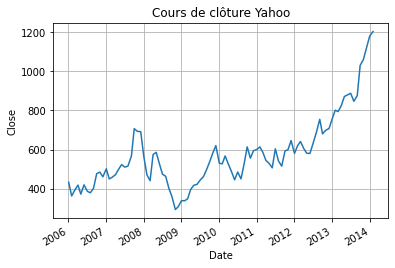

In [91]:
import matplotlib.pyplot as plt

# Chargement des données
good = pd.read_csv("yahoo.csv")
print(good.head())

# keep only close variable
df = good[['date', 'close']]

# reorder date en ordre croissant
df = df.sort_values('date')

# convert index to datetimeIndex
df.index = pd.to_datetime(df['date'])
df = df.drop(columns='date')  

# plot
df['close'].plot(title="Cours de clôture Yahoo")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.show()

Rééchantillonner les données pour avoir les prix de closure en moyenne à la fin de l'année d'affaire.  
Plot la variable close sans ss-echantillonage + avec l'échantillonage effectué

/tmp/ipykernel_3922/1173215777.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df.resample('A').mean()


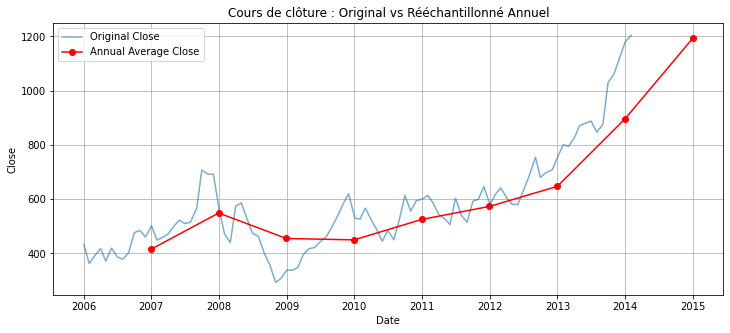

In [93]:
# Sous-échantillonage annuel 
df_annual = df.resample('A').mean() 

# plot
plt.figure(figsize=(12,5))

plt.plot(df.index, df['close'], label='Original Close', alpha=0.6)

plt.plot(df_annual.index, df_annual['close'], marker='o', linestyle='-', color='red', label='Annual Average Close')

plt.title("Cours de clôture : Original vs Rééchantillonné Annuel")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.show()

Changer la fréquence d'échantillonnage en journalier. Remplir les données manquantes en prenant les valeurs suivantes.  
Par les précédentes.  
Se focaliser sur les 10 premières valeurs pour voir la différence. 

In [96]:
# Sur-échantillonnage avec Nan
df_daily = df.resample('D').asfreq()  

# Sur-échantillonage avec valeur valeur précédente
df_ffill = df_daily.ffill() 
df_bfill = df_daily.bfill()  

print(pd.concat([df.head(10), df_ffill.head(10), df_bfill.head(10)], 
                axis=1, keys=['Original','FFill','BFill']))

           Original   FFill   BFill
              close   close   close
date                               
2006-01-03   432.66  432.66  432.66
2006-01-04      NaN  432.66  362.62
2006-01-05      NaN  432.66  362.62
2006-01-06      NaN  432.66  362.62
2006-01-07      NaN  432.66  362.62
2006-01-08      NaN  432.66  362.62
2006-01-09      NaN  432.66  362.62
2006-01-10      NaN  432.66  362.62
2006-01-11      NaN  432.66  362.62
2006-01-12      NaN  432.66  362.62
2006-02-01   362.62     NaN     NaN
2006-03-01   390.00     NaN     NaN
2006-04-03   417.94     NaN     NaN
2006-05-01   371.82     NaN     NaN
2006-06-01   419.33     NaN     NaN
2006-07-03   386.60     NaN     NaN
2006-08-01   378.53     NaN     NaN
2006-09-01   401.90     NaN     NaN
2006-10-02   476.39     NaN     NaN


Appliquer une fréquence journalière sur le jeux de données. Décaler les donées de 900 jours. Décales les indices de 900 jours. 

In [97]:
# On applique une fréquence sur le jeux de données
df_daily = df.resample('D').asfreq()  

# On décale le jeux de données de 900 jours
df_shifted_values = df_daily.shift(900)  
df_shifted_index = df_daily.copy()
df_shifted_index.index = df_shifted_index.index + pd.Timedelta(days=900)

print("Original :\n", df_daily.head(), "\n")
print("Décalage des valeurs (shift) :\n", df_shifted_values.head(), "\n")
print("Décalage des indices :\n", df_shifted_index.head())

Original :
              close
date              
2006-01-03  432.66
2006-01-04     NaN
2006-01-05     NaN
2006-01-06     NaN
2006-01-07     NaN 

Décalage des valeurs (shift) :
             close
date             
2006-01-03    NaN
2006-01-04    NaN
2006-01-05    NaN
2006-01-06    NaN
2006-01-07    NaN 

Décalage des indices :
              close
date              
2008-06-21  432.66
2008-06-22     NaN
2008-06-23     NaN
2008-06-24     NaN
2008-06-25     NaN


Créer un DataFrame qui reprendra la valeur des actions en fermeture, la moyenne et l'écart-type de ceux-ci calculés avec une fenêtre glissante d'un an (365 jours)

             Close  RollingMean365  RollingStd365
date                                             
2006-01-03  432.66      432.660000            NaN
2006-02-01  362.62      397.640000      49.525759
2006-03-01  390.00      395.093333      35.296699
2006-04-03  417.94      400.805000      31.001030
2006-05-01  371.82      395.008000      29.813150
2006-06-01  419.33      399.061667      28.454392
2006-07-03  386.60      397.281429      26.398770
2006-08-01  378.53      394.937500      25.323717
2006-09-01  401.90      395.711111      23.801588
2006-10-02  476.39      403.779000      33.977606


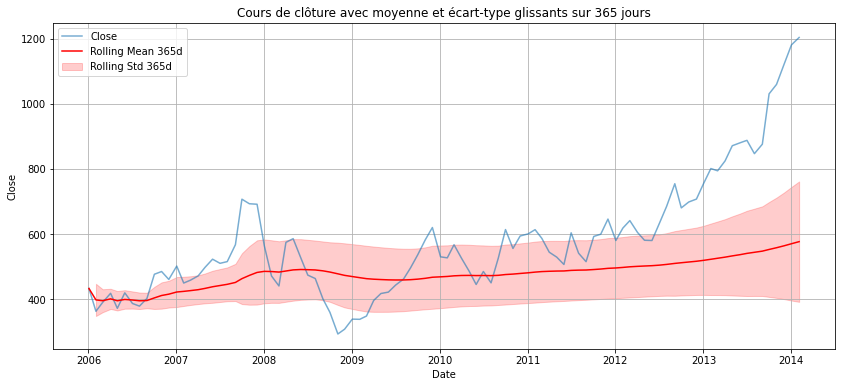

In [99]:
# On crée la fenêtre glissante
rolling_mean = df['close'].rolling(window=365, min_periods=1).mean()
rolling_std = df['close'].rolling(window=365, min_periods=1).std()

# On crée le DataFRame
df_rolling = pd.DataFrame({
    'Close': df['close'],
    'RollingMean365': rolling_mean,
    'RollingStd365': rolling_std
})

# plot
print(df_rolling.head(10))

plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label='Close', alpha=0.6)
plt.plot(df.index, rolling_mean, label='Rolling Mean 365d', color='red')
plt.fill_between(df.index, rolling_mean - rolling_std, rolling_mean + rolling_std, 
                 color='red', alpha=0.2, label='Rolling Std 365d')
plt.title("Cours de clôture avec moyenne et écart-type glissants sur 365 jours")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.show()